In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem

#from rdkit.Chem.EState import Fingerprinter
#from rdkit.Chem import Descriptors
#from rdkit.Chem.rdmolops import RDKFingerprint

file = "BradleyDoublePlusGoodMeltingPointDataset.xlsx"
data = pd.read_excel(file, usecols = ['smiles','mpC'])

print ("the number of data point is ", data.shape)

addH = True
fp_case = 9
fp_len = 128

the number of data point is  (3041, 2)


In [2]:
all_smiles = data['smiles'].values
all_y = data['mpC'].values

print ("THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:")

smiles = []
y = []
for idx in range(len(all_smiles)):
    tsmiles = all_smiles[idx]
    tmol = Chem.MolFromSmiles(tsmiles, sanitize=False)
    problems = Chem.DetectChemistryProblems(tmol)
    if (len(problems)>0):
        print (tsmiles)
    else:
        smiles.append(tsmiles)
        y.append(all_y[idx])

THESE SMILES STRINGS ARE NOT CORRECT, REMOVE DATA:
c1cccn1
N#Cc3cncc3c1cccc2OC(F)(F)Oc12
COc1cc(cc(OC)c1OC)/C=C/C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
c1cncn1
c1cccc2nccc12
Cc1cc2nnnc2cc1
O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)C[N@@](CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C=O)[C@@H]6[C@]98CCN7CC=C[C@@](CC)([C@@H](OC(C)=O)[C@]6(O)C(=O)OC)[C@H]78
[O-][N+](=O)c1ccc2ncnc2c1
[O-][N+](=O)c1cnc(C)n1
c1cccc2ncnc12


RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 


Cc2cnc1ccccc12
c1cccc2nnnc12
n2cnc(NCc1ccccc1)c3ncnc23
n1c3ccccc3nc1c2cscn2
N[C@@H](Cc1cncn1)C(=O)O
Sc1nc2ccccc2n1


RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [13:29:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 


In [3]:
data = pd.DataFrame(list(zip(smiles, y)), columns = ['smiles', 'mpC'])

def Mol_from_SMILES(smiles, addH):
    mol = Chem.MolFromSmiles(smiles)
    if addH:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol, useRandomCoords=True)
    return mol
#AllChem.UFFOptimizeMolecule(tmol)
#tmol.UpdatePropertyCache(strict=False)
#print("AutoCorr3D:",len(rdMolDescriptors.CalcAUTOCORR3D(tmol)))

data['Mol'] = data['smiles'].apply(Mol_from_SMILES, addH=addH)

RDKit ERROR: [13:30:22] UFFTYPER: Unrecognized charge state for atom: 0


In [4]:
data.head()

,smiles,mpC,Mol
0,C1(CCC1)C,-161.51,<rdkit.Chem.rdchem.Mol object at 0x7fbb692ab080>
1,[O-][N+]#N,-90.80,<rdkit.Chem.rdchem.Mol object at 0x7fbb69299030>
2,FS(F)(=O)=O,-135.80,<rdkit.Chem.rdchem.Mol object at 0x7fbb3a34cb20>
3,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,<rdkit.Chem.rdchem.Mol object at 0x7fbb3aaada30>
4,BrBr,-7.20,<rdkit.Chem.rdchem.Mol object at 0x7fbb6931dd50>


In [5]:
from rdkit.Chem.rdMolDescriptors import *

from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs

from rdkit import Chem, DataStructs, RDConfig
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors3D

In [6]:
from rdkit.Chem import rdqueries
def element_count(mol, Zelement):
    q = rdqueries.AtomNumEqualsQueryAtom(Zelement)
    return len(mol.GetAtomsMatchingQuery(q))

In [7]:
from sklearn.preprocessing import StandardScaler

def generate_fingerprint(mol, fp_case, fp_len):
    #print ("Using the fingerprint:")
    if (fp_case==0):
        #print ("Estate (1995)")
        return FingerprintMol(mol)[0]
    elif (fp_case==1):
        #print ("Morgan circular")
        return GetMorganFingerprintAsBitVect(mol, 2, fp_len)
    elif (fp_case==2):
        #print ("Atom pair (1985)")
        return GetHashedAtomPairFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==3):
        print ("Topological torsion (1987)")
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, fp_len)
    elif (fp_case==4):
        print ("Avalon bit based (2006)")
        return GetAvalonFP(mol, fp_len)
    elif (fp_case==5):
        print ("Avalon+mol. weight")
        return np.append(GetAvalonFP(mol, fp_len), Descriptors.MolWt(mol))
    elif (fp_case==6):
        print ("RDKit fingerprint")
        return RDKFingerprint(mol, fpSize=fp_len)
    elif (fp_case==7):
        print ("ErG fingerprint (2006)")
        return GetErGFingerprint(mol)
    elif (fp_case==8):
        #AllChem.EmbedMolecule(mol)
        factory = Gobbi_Pharm2D.factory
        return Generate.Gen2DFingerprint( mol, factory)
        #, dMat = Chem.Get3DDistanceMatrix(mol) )
    elif (fp_case==9):
        #mol = Chem.AddHs(mol)
        #ps = AllChem.ETKDGv2()
        #ps.randomSeed = 0xf00d
        #AllChem.EmbedMolecule(mol,ps)
        #AllChem.EmbedMolecule(mol)
        return np.concatenate((
            rdMolDescriptors.CalcAUTOCORR3D(mol),
            rdMolDescriptors.CalcMORSE(mol),
            rdMolDescriptors.CalcRDF(mol),
            rdMolDescriptors.CalcWHIM(mol)
            #return    rdMolDescriptors.CalcGETAWAY(mol)
        ))
    


#Scale X to unit variance and zero mean
data['Fingerprint'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case, fp_len=fp_len)

fp_element_count = False
fp_add_fp2 = False
fp_add_fp3 = False

X = np.array(list(data['Fingerprint']))
if fp_element_count:
    data['C_count'] = data['Mol'].apply(element_count, Zelement=6)
    data['N_count'] = data['Mol'].apply(element_count, Zelement=7)
    data['O_count'] = data['Mol'].apply(element_count, Zelement=8)
    X1 = data[['C_count','N_count','O_count']].values
    X = np.concatenate((X,X1), axis=1)
if fp_add_fp2:
    data['Fingerprint_2'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case+1, fp_len=fp_len)
    X2 = np.array(list(data['Fingerprint_2']))
    X = np.concatenate((X,X2), axis=1)
if fp_add_fp3:
    data['Fingerprint_3'] = data['Mol'].apply(generate_fingerprint, fp_case=fp_case+2, fp_len=fp_len)
    X3 = np.array(list(data['Fingerprint_3']))
    X = np.concatenate((X,X3), axis=1)

#st = StandardScaler()
#X = st.fit_transform(X)

In [8]:
#print("AutoCorr3D:",len(rdMolDescriptors.CalcAUTOCORR3D(doravirine)))
#print("Morse:",len(rdMolDescriptors.CalcMORSE(doravirine)))
#print("RDF:",len(rdMolDescriptors.CalcRDF(doravirine)))
#print("WHIM:",len(rdMolDescriptors.CalcWHIM(doravirine)))
#print("GETAWAY:",len(rdMolDescriptors.CalcGETAWAY(doravirine)))

In [9]:
for tsmiles in smiles:
    print (tsmiles)
    tmol = Chem.MolFromSmiles(tsmiles)
#    #tmol = Chem.AddHs(Chem.MolFromSmiles(tsmiles))
#    #tmol = Chem.MolFromMolBlock(Chem.MolFromSmiles(tsmiles), sanitize=False)
#    tmol.UpdatePropertyCache(strict=False)
#    tmol = Chem.AddHs(tmol, addCoords=True)
#    #ps = AllChem.ETKDGv2()
#    #ps.randomSeed = 0xf00d
#    #AllChem.EmbedMolecule(tmol,ps)
#    AllChem.EmbedMolecule(tmol)
#    print("AutoCorr3D:",len(rdMolDescriptors.CalcAUTOCORR3D(tmol)))


C1(CCC1)C
[O-][N+]#N
FS(F)(=O)=O
CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C
BrBr
O=C(O)C2=CN(CC)c1c(F)c(c(F)cc1C2=O)N3CC(C)NCC3
CN(C)C
ClC(Cl)(Cl)Cl
II
C#C
CC(Cl)Cl
CC(CO)(CO)[N+](=O)[O-]
c1cc(sc1)Cl
CCCOC(=O)CC
CC(=C)OC(=O)C
CCCOC=O
Cc1c(cc(cc1[N+](=O)[O-])[N+]([O-])=O)[N+]([O-])=O
CCc1cccc(CC)c1
CC(=CCCC(=O)C)C
CC(C)C(C)(C)CC
CC(C)(CC)CCC
CC(C)(C)CCCC
C=C(C)C(C)(C)C
CC(C)C(CC)CC
CCSCCCC
Cc1ccc(CC)cc1C
CC(CC)(CC)CC
CC(C)CC(C)C(C)C
CC(C)CCCC(C)C
CC=1CCCCC=1C
CCCC1CCCCC1
C(=C(Cl)Cl)(C(Cl)(Cl)Cl)Cl
CCc1cc(C)cc(CC)c1
C=C(C)CC(C)C
C/C(C)=C(/C)CCC
CC(C)C(C)(C)C(C)C
CCC=1CCCCC=1
C1CC1CCl
CC1CCCC1CC
CC(C)C1CC1
CC(C)CC#CC
CCC1CCC1
CCC/C=CC
CC(=O)OCCOC
CCc1cccnc1
C1CCCS1
BrCCl
CC1CO1
CC(=C)C=C
CC(=O)OC(C)CC
CCCCCCC(=O)OCC
CCCC#N
CCSCC
CCSC
CCCCC#C
CCCCC#CCC
CCc1cnc(C)cc1
CCc1ccccc1Br
COc5ccc(CCN1CCC(CC1)Nc3nc2ccccc2n3Cc4ccc(F)cc4)cc5
C1=CC=C(C=C1)C2=CC=C(C=C2)C(=O)CCC(=O)O
CCc1ccccc1
CCCCCl
C1C=CCC1
CCCCc1ccccc1
OCCOC
O=C1C=C(C)CC(C)(C)C1
C(CBr)Br
CCCCCCCCCCCCCCC=C
CCCCCCCCCCCCCCC
CC(C)OC(=O)/C

O=C(NNCCC(=O)NCc1ccccc1)c2ccncc2
ClC(Cl)(Cl)F
CCCCOC(=O)C=C
CC(=C)Cl
CC(=C)CCC(=C)C
CC(C)c1cc(c(cc1C(C)C)C(C)C)C(C)C
c1ccco1
c1ccc(c(c1)C(=O)N)[N+](=O)[O-]
Nc2nc(N)ncc2Cc1cc(OC)c(OC)c(OC)c1
CCCCCCCCCCCCCCBr
CC1OC(C)OC(C)O1
Oc1ccccc1Br
O=C(O)CCCCCCCC=CCCCCCC
C1COC1=O
CC(C)(OOC(C)(C)c1ccccc1)c2ccccc2
c1ccc(cc1)NN
C(CF)O
CC(C)(C)C
CCCCCCCCCCCCCCCCCCCCCCCCCC
C1CCS(=O)(=O)C1
c1ccc(cc1)[SiH](c2ccccc2)c3ccccc3
C#CCCO
CN(C)C=O
O=C(O)CCCCCCCCCC
ClC(Cl)Cl
OC1CCCCCCCCC1
O=C1N(C(=O)N(C(=O)N1C)C)C
Cc1ccncc1
IC#N
c1ccc(c(c1)Cl)Br
c1ccc2c(c1)cc(cn2)Br
CCOc1ccccc1C(=O)O
c1ccc(cc1)OCCCBr
CCC(c1ccccc1)c2ccccc2
CCl
C1CO1
FC(F)(F)C(F)(F)F
CC(C)(C)c1ccc(c(c1)O)O
c1cc(c(cc1Cl)C=O)O
Cc1cc(ccc1O)Br
CC(C)OC(=O)Nc1ccccc1
C1CCCCCCCCCCCCCC1
Fc1cc(F)c(F)c(F)c1F
C=CC=O
c1ccc(cc1)Oc2ccc(cc2)Br
O=C1N=C(C=CN1CC)NS(=O)(=O)c2ccc(N)cc2
c1ccc(cc1)C(c2ccc(cc2)Cl)O
c1cc(ccc1OCC(=O)O)F
C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl
O=C=Nc1ccc(cc1)Cc2ccc(N=C=O)cc2
CCCCC(CC)COC(=O)CCCCC(=O)OCC(CC)CCCC
CC(C)OC(C)C
C1OCOCO1
CCCC

ON=C1/CCCCC1
CCCN(CCC)CCC
CCCc1ccccc1
CCNc1ccccc1
O=COC
C=C(C)CC(C)(C)C
CC1CCCCC1
Clc1ccccc1
CCCCN
CCCCCCCCC
CCCCCCCCN
CCCCCCCCCCO
CCCCCCCCCCCCCCCCCCCC
c1ccc(cc1)C(c2ccccc2)C(=O)O
O=C(O)CCCCCCC(=O)O
CC(C)(C)Cl
c1ccccc1C(c2ccccc2)c3ccccc3
C=C(C)CC
CCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCC=C
NC1=NCC(O1)c2ccccc2
OC(=O)c1cc(ccc1Cl)[N+]([O-])=O
NCCCCCCO
CC(Oc1c(Cl)cccc1Cl)C2=NCCN2
Clc1ccc(OC)c(Cl)c1Cl
C1=C2C(=NC(=N1)N)N(C=N2)COCCO
CC(C)(Cl)CC
O=[N+]([O-])c1ccc(CC#N)cc1
COc1cc(cc(OC)c1)C=O
O=CC=Cc1ccccc1
Nc1cc(ccc1O)[N+]([O-])=O
Cc1ccc(N)cc1
C=CCCl
BrC(Br)Br
CC(=O)OCCOCC
COC(=O)c1ccc(cc1)C(=O)OC
Cc1ccc(Cl)cc1
COc1cc(ccc1OC)C=O
Oc1cc(C)c(Cl)c(C)c1
Oc1ccc(Cl)c(C)c1
ClCCCCCl
CCCCO
CCCSc1ccc2c(c1)nc([nH]2)NC(=O)OC
CCC1(CCC(C)C)C(=O)NC(=O)NC1=O
CNC(NCCSCc1nc[nH]c1C)=NC#N
O=C(O)CCCCCCCCC
OC3N=C(c1ccccc1Cl)c2cc(Cl)ccc2NC3=O
O=Cc1c(Cl)cccc1Cl
COC1=C(C=C(C=C1)C(=O)O)OC
O=Cc1ccc(O)cc1O
CCC#N
NC1CCCCC1
CCCCC=O
C1=CC(=CC(=C1)[N+](=O)[O-])C(=O)O
Oc1ccc2ccccc2c1
C1=CC=C2C(=C1)C3=CC=CC4=C3C2=CC=C

Nc1cccc(Cl)c1Cl
O=Cc1ccccc1Br
COc1cc(ccc1OC)C(C)=O
CC(N)=O
Cc1ccccc1
N#Cc1c(Cl)cccc1Cl
NS(=O)(=O)c2cc1c(NCNS1(=O)=O)cc2C(F)(F)F
CC(C)O
Nc1ccccc1O
ClCCl
CC2(C)C(=C)C1CCC2C1
Nc1ccc(Cl)cc1[N+]([O-])=O
Cc1ccc(cc1C)[N+](=O)[O-]
O=[N+]([O-])c1ccc(CCl)cc1
CCC(=O)CCCC
CCCCNCCCC
CCCCCCCCCCCCO
C1CCCCCCCCCCC1
Ic1ccc(O)cc1
COc1ccccc1C(=O)O
Nc1cccc(O)c1
N#Cc1ccc(C#N)cc1
O=Cc1ccc(C=O)cc1
COc1c(cc(cc1OC)C(=O)OC)OC
CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O
C1=CC=C(C=C1)C2=CC(=C(C=C2Cl)Cl)Cl
O=[N+]([O-])c1cc(ccc1)C(=O)OC
O=C(C)c1ccc(C#N)cc1
Nc1ccc(CC#N)cc1
C[C@@H](c1ccc2cc(ccc2c1)OC)C(=O)O
COc1ccc(/C=C/C)cc1
O=C(/C=C/C(=O)OCC)OCC
Oc1cccc(O)c1O
CC(C)(C)c1ccc(cc1)O
OCCOc1ccccc1
Oc1ccccc1C(=O)OC
BrCc1ccccc1
O=[N+]([O-])c1ccccc1N
O=[N+]([O-])c1ccccc1Cl
CC(=O)CC(=O)OCC
Nc1ccc(OC)cc1
Clc1ccc(Cl)c(N)c1
COc1ccc(C=O)cc1
Nc1ccccc1C(=O)OCC
CC(=O)/C=C/c1ccccc1
N(=N/c1ccccc1)c2ccccc2
CC(C)CC1(CC=C)C(=O)NC(=O)NC1=O
C1=C(C(=NC(=N1)O)O)F
CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3
CC(C)NCC(O)COc1cccc2[nH]ccc12
C1=CC=NC(=C1)NS(=

C1=CC=C(C=C1)CCC2=CC=CC=C2
C1=CC=C2C(=C1)NC3=CC=CC=C3S2
COC(=O)C1=CC=C(C=C1)O
CCOC(=O)C1=CC=C(C=C1)N
C1=CC=C(C(=C1)C(=O)O)O
C=CC=C
CC#N
CCCCOCCO
CCCCCCCCCCCCCCCCCO
Cc1cccc(c1)C=C
CC(O)(C#C)c1ccccc1
CC1=CC=CC=C1C(=O)O
BrCCCCCCBr
c1cc(cc(c1)I)I
OCCCCO
CC1CCC(C)C1C
C(C(CO)([N+](=O)[O-])Br)O
c1ccc(cc1)COC(=O)CCC(=O)OCc2ccccc2
COc1ccc(c(c1)O)C(=O)c2ccc(cc2O)OC
c1c(cc(c(c1C(=O)O)O)I)I
c1cc(ccc1C(=O)c2ccc(cc2)F)F
c1ccc(c(c1)c2ccccc2C(=O)O)C(=O)O
O=C(O)c4ccccc4C=2c3cc(Br)c(O)c(Br)c3OC=1C=2C=C(Br)C(=O)C=1Br
CCCCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCCCC
C(CCCO)CCCO
CC12CCC(C1)C(C)(C)C2O
CC(=O)N1CCOCC1
CCCCCCCCCCCCCCCCC#C
O=C1C=CC(=O)C2C3C=CC(C3)C12
CCOC(=O)C(C(=O)OCC)NC=O
c1cnc([nH]1)S
CN3[C@H]1CC[C@@H]3[C@H]([C@H](C1)OC(=O)c2ccccc2)C(=O)OC
CC(C)(C(=O)O)Br
C(C(=O)O)(Cl)Br
CN(C)c1ccc(cc1)Cc2ccc(cc2)N(C)C
CN(C)CC(=O)O
C(CCCC(=O)O)CCCC(=O)O
CCC(=O)N(C1CCN(CC1)CCc2ccccc2)c3ccccc3
CC1CNC(C)CN1
Clc1cc(Cl)cc(Cl)c1N
C(CCl)P(=O)(O)O
OC1c3ccccc3Oc2ccccc12
COc1ccc2c(c1)c(ccn2)[C@@H](

In [10]:
#tsmile = "CCCCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCCCC"

#params = Chem.SmilesParserParams()
#params.removeHs = False

#tmol = Chem.MolFromSmiles(tsmiles, params)
#tmol
#tmol = Chem.MolFromSmiles(tsmiles)
#AllChem.EmbedMolecule(tmol)
#tmol.UpdatePropertyCache(strict=False)
#print("AutoCorr3D:",len(rdMolDescriptors.CalcAUTOCORR3D(tmol)))

In [11]:
#tmol

In [12]:
#tmol = Chem.AddHs(tmol)
#tmol
#AllChem.EmbedMolecule(tmol)
#AllChem.EmbedMolecule(tmol, useRandomCoords=True)
#AllChem.UFFOptimizeMolecule(tmol)
#tmol.UpdatePropertyCache(strict=False)
#print("AutoCorr3D:",len(rdMolDescriptors.CalcAUTOCORR3D(tmol)))

In [13]:
#tmol

In [14]:
#AllChem.EmbedMolecule(tmol, useRandomCoords=True)

In [15]:
print ("The shape of the fingerprint is", X.shape)

The shape of the fingerprint is (3025, 628)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


<Figure size 432x288 with 0 Axes>

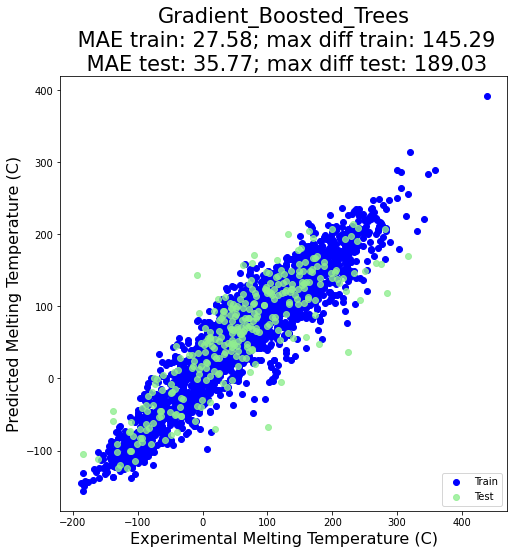

<Figure size 432x288 with 0 Axes>

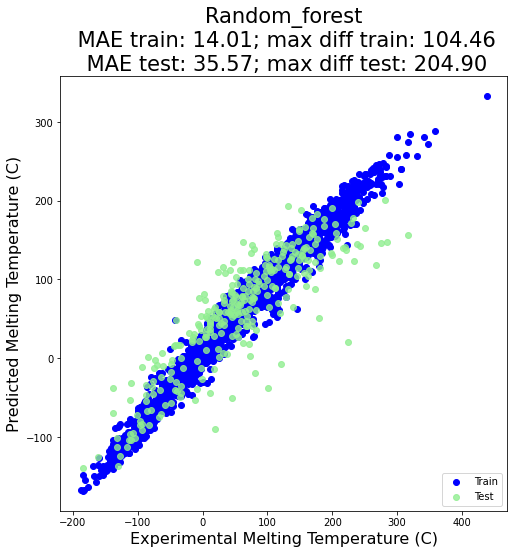

\begin{tabular}{c c c}
           name     &     test MAE err   & .    abs error in CV \\ 
\hline
        Gradient_Boosted_Trees & 35.770 & 37.419 \\
                 Random_forest & 35.571 & 37.579 \\
\end{tabular}


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.model_selection import cross_val_score

import pickle


def make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, title, figsize, fontsize, fname):    
    plt.clf()
    f = plt.figure(figsize=figsize)
    plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
    plt.title(title,fontsize=fontsize+5)
    plt.xlabel('Experimental Melting Temperature (C)', fontsize=fontsize)
    plt.ylabel('Predicted Melting Temperature (C)', fontsize=fontsize)
    plt.scatter(y_test,y_pred_test,c='lightgreen', label='Test', alpha = 0.8)
    plt.legend(loc=4)
    #plt.xlim(-200,500)
    #plt.ylim(-200,500)
    plt.show()
    f.savefig(fname+".pdf")

from sklearn.model_selection import train_test_split

def test_models_and_plot(x, y, model_dict, plots, fp_case, fp_len):
    ''' test a bunch of models and print out a sorted list of CV accuracies
        inputs: 
            x: training data features, numpy array or Pandas dataframe
            y: training data labels, numpy array or Pandas dataframe
            model_dict: a dictionary of the form {name : model()}, where 'name' is a string
                        and 'model()' is a scikit-learn model object. 
    '''

    mean_scores = {}
    percent_errors = {}
    
    for (name, model) in model_dict.items():
        #print("running %s" % name)
        scores = cross_val_score(model, x, y, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')
        scores = -1*scores
        mean_score = scores.mean()
        mean_scores[name] = mean_score

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
        model.fit(X_train, y_train)
        # save the model to disk
        filename = name + "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
        pickle.dump(model, open(filename, 'wb'))
        
        y_pred_train = model.predict(X_train)
        mae_train = np.mean(np.abs(y_train-y_pred_train))
        max_train = np.max(np.abs(y_train-y_pred_train))
        y_pred_test  = model.predict(X_test)
        mae_test = np.mean( np.abs(y_test -y_pred_test))
        max_test = np.max( np.abs(y_test -y_pred_test) )
        
        percent_errors[name] = mae_test

        #fulltitle = name+'\n MAE error: '+str(percent_error)
        fulltitle = name + \
            "\n MAE train: " +  str("{:.2f}".format(mae_train)) + "; max diff train: " +  str("{:.2f}".format(max_train)) + \
            "\n MAE test: " +  str("{:.2f}".format(mae_test)) + "; max diff test: " +  str("{:.2f}".format(max_test))
        

        if plots:
            fname = name + "_" + str(fp_case) + "_" + str(fp_len)
            make_scatter_plot(y_pred_train, y_pred_test, y_train, y_test, fulltitle, (8,8), 16, fname)

    sorted_names = sorted(percent_errors, key=mean_scores.__getitem__, reverse=False)

    print("\\begin{tabular}{c c c}")
    print("           name     &     test MAE err   & .    abs error in CV \\\\ ")
    print("\\hline")
    for i in range(len(sorted_names)):
        name = sorted_names[i]
        print("%30s & %5.3f & %5.3f \\\\" % (name, percent_errors[name], mean_scores[name]))
    print("\\end{tabular}")


alpha_grid = {'alpha': np.logspace(1e-11,1e-1,8)}

model_dict = {
            #'Linear_Regression': LinearRegression(),
            #'Kernel Ridge Regression': KernelRidge(),
            #'Ridge Regression':Ridge(),
            #'Gaussian Process Regressor': GaussianProcessRegressor(normalize_y=True),
            #'Support Vector Regression': SVR(),
            #'KNeighborsRegressor': KNeighborsRegressor(),
            'Gradient_Boosted_Trees': GradientBoostingRegressor(n_estimators=100),
            'Random_forest': RandomForestRegressor(n_estimators=100)
            #'Neural_Network': MLPRegressor(alpha=0.01,max_iter=8000, hidden_layer_sizes=[80,60], early_stopping=False)
            }

test_models_and_plot(X, y, model_dict, plots=True, fp_case=fp_case, fp_len=fp_len)

In [18]:
import glob

filename = "A.txt"
print("read SMILES from file:", filename)
smiles = np.loadtxt(filename, dtype=str)

for tsmiles in smiles:
    print ("**********************************")
    print (tsmiles)
    tmol = Mol_from_SMILES(tsmiles, addH=addH)
    fp = generate_fingerprint(tmol, fp_case, fp_len)
    X = np.array(list(fp))
    
    X1 = []
    if fp_element_count:
        Zelement = 6
        X1.append(element_count(tmol, Zelement))
        Zelement = 7
        X1.append(element_count(tmol, Zelement))
        Zelement = 8
        X1.append(element_count(tmol, Zelement))
        X1 = np.array(X1)
        X = np.concatenate((X,X1), axis=0)
    if fp_add_fp2:
        fp_2 = generate_fingerprint(tmol, fp_case+1, fp_len)
        X2 = np.array(list(fp_2))
        X = np.concatenate((X,X2), axis=0)
    if fp_add_fp3:
        fp_3 = generate_fingerprint(tmol, fp_case+2, fp_len)
        X3 = np.array(list(fp_3))
        X = np.concatenate((X,X3), axis=0)

        
    nlen = X.shape[0]
    X = np.reshape(X, (1, nlen)) 
    print ("The shape of the fingerprint is", X.shape)
    #X = st.transform(X)
    
    postname = "_" + str(fp_case) + "_" + str(fp_len) + ".sav"
    files_model = glob.glob('*'+postname)
    for f in files_model:
        model = pickle.load(open(f, 'rb'))
        y_pred = model.predict(X)
        print (f, y_pred)


read SMILES from file: A.txt
**********************************
CO[N+](=O)[O-]
The shape of the fingerprint is (1, 628)
Gradient_Boosted_Trees_9_128.sav [-43.35980213]
Random_forest_9_128.sav [-25.283]
**********************************
CCO[N+](=O)[O-]
The shape of the fingerprint is (1, 628)
Gradient_Boosted_Trees_9_128.sav [-22.22855772]
Random_forest_9_128.sav [12.682]
**********************************
C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-]
The shape of the fingerprint is (1, 628)
Gradient_Boosted_Trees_9_128.sav [54.79677097]
Random_forest_9_128.sav [86.74]
**********************************
C(C(CO[N+](=O)[O-])(CO[N+](=O)[O-])[N+](=O)[O-])O[N+](=O)[O-]
The shape of the fingerprint is (1, 628)
Gradient_Boosted_Trees_9_128.sav [161.70262669]
Random_forest_9_128.sav [111.786]
**********************************
CC(CO[N+]([O-])=O)(CO[N+]([O-])=O)CO[N+]([O-])=O
The shape of the fingerprint is (1, 628)
Gradient_Boosted_Trees_9_128.sav [83.67220143]
Random_forest_9_128.sav [93.578